# nCov2019数据分析

## 数据来源

本数据来源于[2019新型冠状病毒疫情时间序列数据仓库](https://github.com/BlankerL/DXY-2019-nCoV-Data)，其数据来源为[丁香园](https://3g.dxy.cn/newh5/view/pneumonia)。

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_util
import plot_util

from IPython.display import display, Markdown

In [2]:
city_name = '深圳'

In [3]:
display(Markdown('## ' + city_name + '数据'))

## 深圳数据

In [4]:
raw_data = data_util.load_data()

In [5]:
display(Markdown('### ' + city_name + '累计数量'))

### 深圳累计数量

In [6]:

city_daily_data = data_util.aggregate_daily(raw_data, city_name)
city_daily_data = data_util.calculate_dead_cured_rate(city_daily_data)
city_daily_data.tail(5)

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7213,广东省,深圳,354,0,39,0,2020-02-08 19:46:49.463,2020-02-08,0.0,11.016949
4102,广东省,深圳,366,0,46,0,2020-02-09 23:00:53.855,2020-02-09,0.0,12.568306
2495,广东省,深圳,369,0,56,0,2020-02-10 21:36:08.643,2020-02-10,0.0,15.176152
540,广东省,深圳,375,0,66,0,2020-02-11 21:55:20.587,2020-02-11,0.0,17.600000
67,广东省,深圳,386,0,66,0,2020-02-12 09:33:11.975,2020-02-12,0.0,17.098446


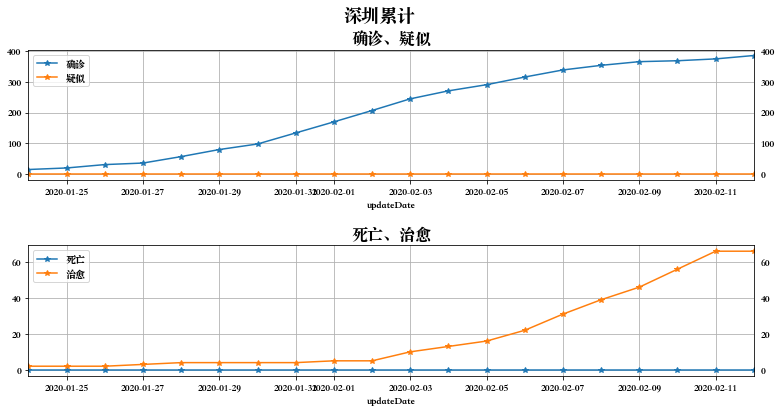

In [7]:
figure = plot_util.plot_conf_main(city_daily_data, city_name + '累计')

In [8]:
display(Markdown('### ' + city_name + '增长速度'))

### 深圳增长速度

In [9]:
city_daily_data_1st_derivative = data_util.diff(city_daily_data)
city_daily_data_1st_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7213,广东省,深圳,15.0,0.0,8.0,0.0,2020-02-08 19:46:49.463,2020-02-08,0.0,1.872406
4102,广东省,深圳,12.0,0.0,7.0,0.0,2020-02-09 23:00:53.855,2020-02-09,0.0,1.551357
2495,广东省,深圳,3.0,0.0,10.0,0.0,2020-02-10 21:36:08.643,2020-02-10,0.0,2.607846
540,广东省,深圳,6.0,0.0,10.0,0.0,2020-02-11 21:55:20.587,2020-02-11,0.0,2.423848
67,广东省,深圳,11.0,0.0,0.0,0.0,2020-02-12 09:33:11.975,2020-02-12,0.0,-0.501554


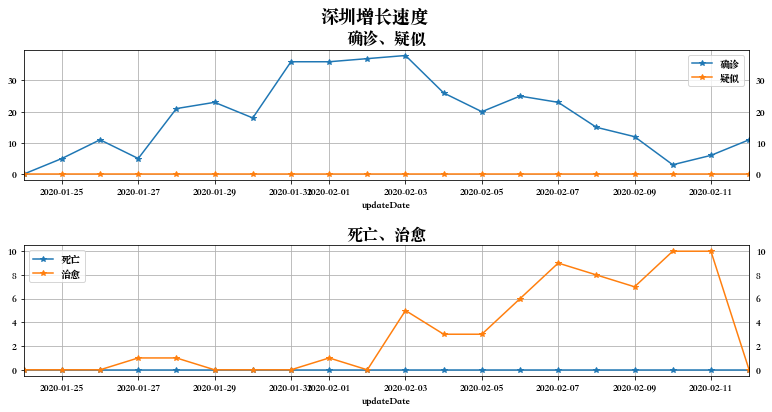

In [10]:
figure = plot_util.plot_conf_main(city_daily_data_1st_derivative, city_name + '增长速度')

In [11]:
display(Markdown('### ' + city_name + '增长加速度'))

### 深圳增长加速度

In [12]:
city_daily_data_2nd_derivative = data_util.diff(city_daily_data_1st_derivative)
city_daily_data_2nd_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7213,广东省,深圳,-8.0,0.0,-1.0,0.0,2020-02-08 19:46:49.463,2020-02-08,0.0,-0.310111
4102,广东省,深圳,-3.0,0.0,-1.0,0.0,2020-02-09 23:00:53.855,2020-02-09,0.0,-0.321050
2495,广东省,深圳,-9.0,0.0,3.0,0.0,2020-02-10 21:36:08.643,2020-02-10,0.0,1.056489
540,广东省,深圳,3.0,0.0,0.0,0.0,2020-02-11 21:55:20.587,2020-02-11,0.0,-0.183998
67,广东省,深圳,5.0,0.0,-10.0,0.0,2020-02-12 09:33:11.975,2020-02-12,0.0,-2.925403


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


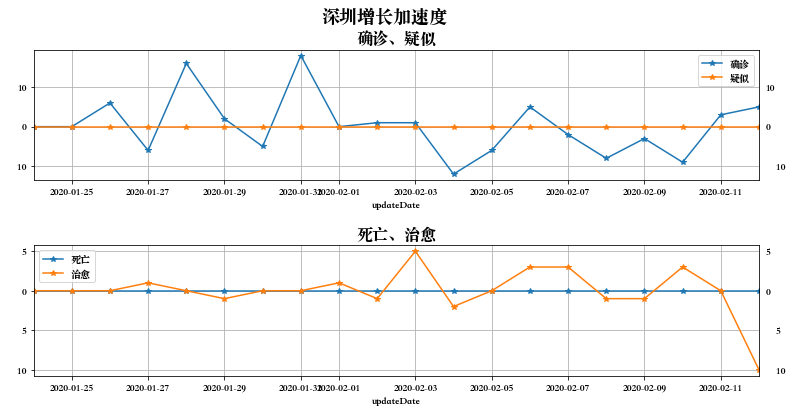

In [13]:
figure = plot_util.plot_conf_main(city_daily_data_2nd_derivative, city_name + '增长加速度')

In [14]:
display(Markdown('### ' + city_name + '死亡治愈率'))

### 深圳死亡治愈率

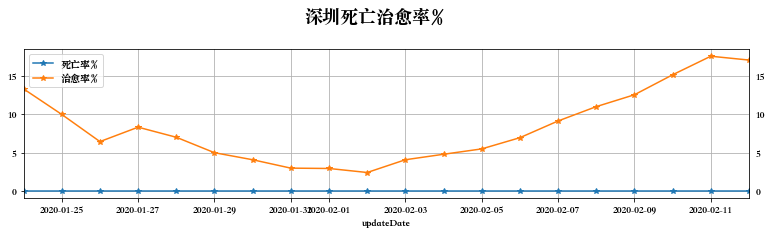

In [15]:
figure = plot_util.plot_conf_dead_cured_ratio(city_daily_data, city_name + '死亡治愈率%')

In [16]:
black_province_name = '湖北省'

In [17]:
display(Markdown('## 全国数据（除' + black_province_name + '）'))

## 全国数据（除湖北省）

In [18]:
display(Markdown('因' + black_province_name + '灾情特别严重且现已隔离（' + black_province_name + '加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。'))

因湖北省灾情特别严重且现已隔离（湖北省加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。

In [19]:
display(Markdown('## 全国累计（除' + black_province_name + '）'))

## 全国累计（除湖北省）

In [20]:
white_daily_data = data_util.aggregate_daily_except(raw_data, province_name=black_province_name)
white_daily_data = data_util.calculate_dead_cured_rate(white_daily_data)

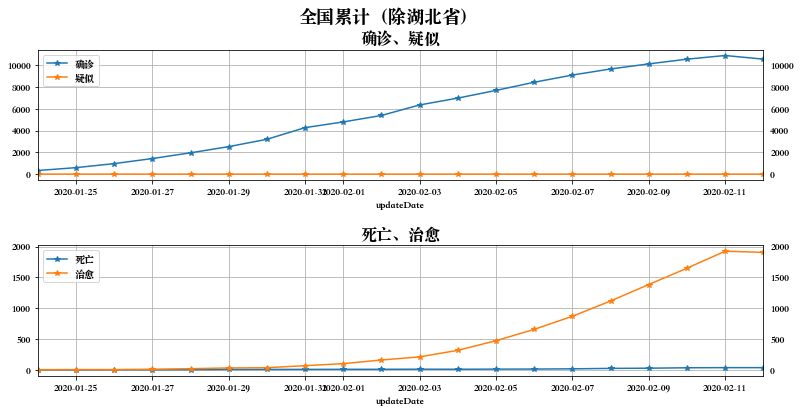

In [21]:
figure = plot_util.plot_conf_main(white_daily_data, '全国累计（除' + black_province_name + '）')

In [22]:
display(Markdown('## 全国增长速度（除' + black_province_name + '）'))

## 全国增长速度（除湖北省）

In [23]:
white_daily_data_1st_derivative = data_util.diff(white_daily_data)
white_daily_data_1st_derivative.tail()

,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,
2020-02-08,558.0,0.0,248.0,7.0,0.061106,2.017085
2020-02-09,466.0,0.0,267.0,3.0,0.017723,2.106149
2020-02-10,433.0,0.0,264.0,7.0,0.055008,1.941016
2020-02-11,337.0,0.0,277.0,2.0,0.008100,2.061066
2020-02-12,-332.0,0.0,-19.0,0.0,0.010698,0.376790


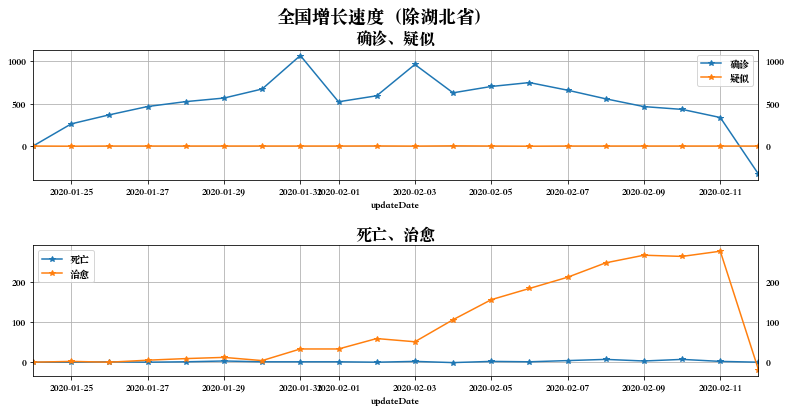

In [24]:
figure = plot_util.plot_conf_main(white_daily_data_1st_derivative, '全国增长速度（除' + black_province_name + '）')

In [25]:
display(Markdown('## 全国增长加速度（除' + black_province_name + '）'))

## 全国增长加速度（除湖北省）

In [26]:
white_daily_data_2nd_derivative = data_util.diff(white_daily_data_1st_derivative)
white_daily_data_2nd_derivative.tail()

,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,
2020-02-08,-102.0,0.0,36.0,3.0,0.029158,0.251458
2020-02-09,-92.0,0.0,19.0,-4.0,-0.043383,0.089064
2020-02-10,-33.0,0.0,-3.0,4.0,0.037285,-0.165132
2020-02-11,-96.0,0.0,13.0,-5.0,-0.046908,0.120049
2020-02-12,-669.0,0.0,-296.0,-2.0,0.002597,-1.684276


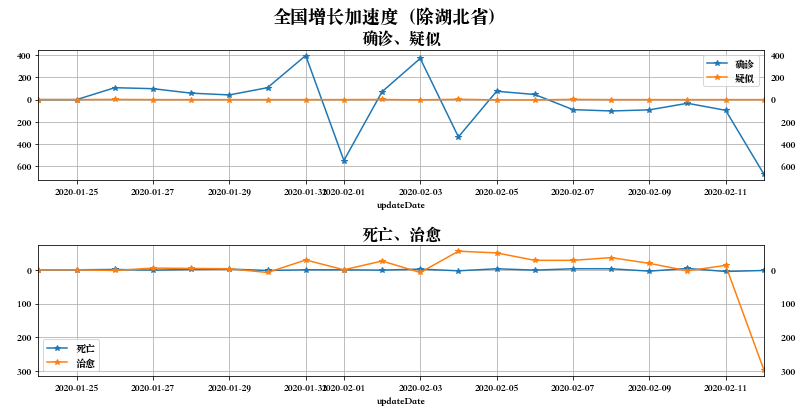

In [27]:
figure = plot_util.plot_conf_main(white_daily_data_2nd_derivative, '全国增长加速度（除' + black_province_name + '）')

In [28]:
display(Markdown('## 全国增死亡治愈率（除' + black_province_name + '）'))

## 全国增死亡治愈率（除湖北省）

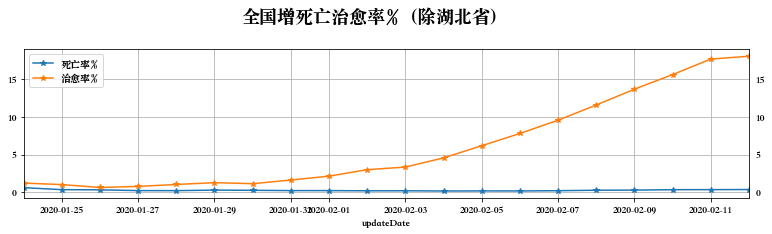

In [29]:
figure = plot_util.plot_conf_dead_cured_ratio(white_daily_data, '全国增死亡治愈率%（除' + black_province_name + '）')

In [30]:
city_name = '武汉'

In [31]:
display(Markdown('## ' + city_name + '数据'))

## 武汉数据

In [32]:
raw_data = data_util.load_data()

In [33]:
display(Markdown('### ' + city_name + '累计数量'))

### 武汉累计数量

In [34]:
city_daily_data = data_util.aggregate_daily(raw_data, city_name)
city_daily_data = data_util.calculate_dead_cured_rate(city_daily_data)
city_daily_data.tail(5)

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7033,湖北省,武汉,13603,0,747,545,2020-02-08 22:02:50.042,2020-02-08,4.006469,5.491436
4544,湖北省,武汉,14982,0,878,608,2020-02-09 19:09:33.896,2020-02-09,4.058203,5.860366
2516,湖北省,武汉,16902,0,1046,681,2020-02-10 21:30:02.904,2020-02-10,4.029109,6.188617
523,湖北省,武汉,18454,0,1242,748,2020-02-11 21:55:20.587,2020-02-11,4.053322,6.730248
422,湖北省,武汉,19558,0,1378,820,2020-02-12 07:26:53.133,2020-02-12,4.192658,7.045710


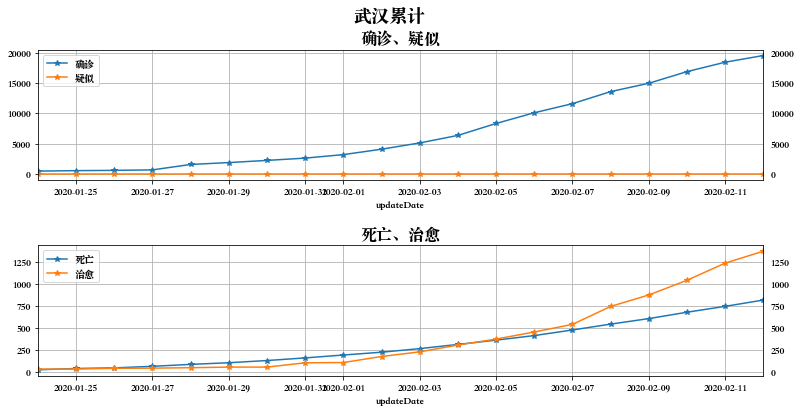

In [35]:
figure = plot_util.plot_conf_main(city_daily_data, city_name + '累计')

In [36]:
display(Markdown('### ' + city_name + '增长速度'))

### 武汉增长速度

In [37]:
city_daily_data_1st_derivative = data_util.diff(city_daily_data)
city_daily_data_1st_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7033,湖北省,武汉,1985.0,0.0,205.0,67.0,2020-02-08 22:02:50.042,2020-02-08,-0.107836,0.826261
4544,湖北省,武汉,1379.0,0.0,131.0,63.0,2020-02-09 19:09:33.896,2020-02-09,0.051734,0.368930
2516,湖北省,武汉,1920.0,0.0,168.0,73.0,2020-02-10 21:30:02.904,2020-02-10,-0.029094,0.328251
523,湖北省,武汉,1552.0,0.0,196.0,67.0,2020-02-11 21:55:20.587,2020-02-11,0.024213,0.541631
422,湖北省,武汉,1104.0,0.0,136.0,72.0,2020-02-12 07:26:53.133,2020-02-12,0.139336,0.315462


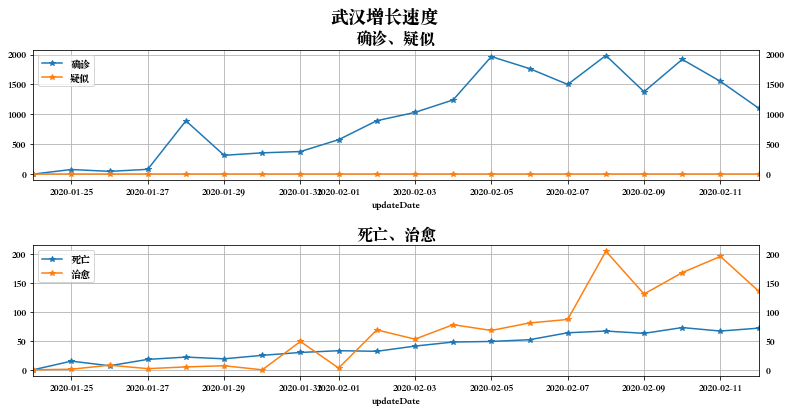

In [38]:
figure = plot_util.plot_conf_main(city_daily_data_1st_derivative, city_name + '增长速度')

In [39]:
display(Markdown('### ' + city_name + '增长加速度'))

### 武汉增长加速度

In [40]:
city_daily_data_2nd_derivative = data_util.diff(city_daily_data_1st_derivative)
city_daily_data_2nd_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7033,湖北省,武汉,484.0,0.0,118.0,3.0,2020-02-08 22:02:50.042,2020-02-08,-0.130019,0.658467
4544,湖北省,武汉,-606.0,0.0,-74.0,-4.0,2020-02-09 19:09:33.896,2020-02-09,0.159570,-0.457331
2516,湖北省,武汉,541.0,0.0,37.0,10.0,2020-02-10 21:30:02.904,2020-02-10,-0.080828,-0.040679
523,湖北省,武汉,-368.0,0.0,28.0,-6.0,2020-02-11 21:55:20.587,2020-02-11,0.053307,0.213380
422,湖北省,武汉,-448.0,0.0,-60.0,5.0,2020-02-12 07:26:53.133,2020-02-12,0.115123,-0.226169


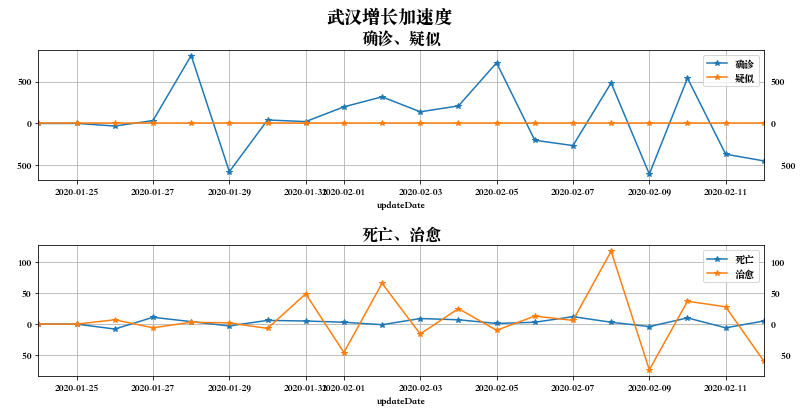

In [41]:
figure = plot_util.plot_conf_main(city_daily_data_2nd_derivative, city_name + '增长加速度')

In [42]:
display(Markdown('### ' + city_name + '死亡治愈率'))

### 武汉死亡治愈率

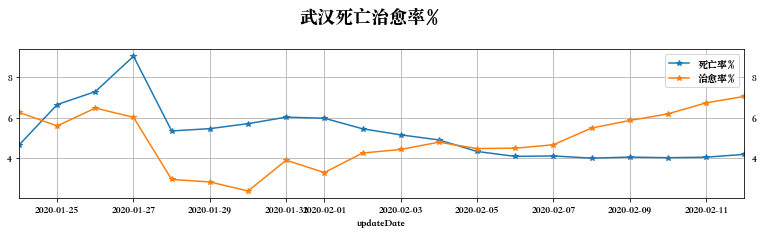

In [43]:
figure = plot_util.plot_conf_dead_cured_ratio(city_daily_data, city_name + '死亡治愈率%')